In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge
from statsmodels.tools.tools import add_constant

import matplotlib.pyplot as plt
%matplotlib inline

# **1. Oracle model: model used to generate data**

This the first model we ran, in which we ended up with high correlation between the shock and button-press regressors (see the figure below).

In [3]:
with open('./modeling/dm_AM_data.1D') as file:
    names = [name.strip() for name in file.readlines()[3].split('"')[1].split(';')]

In [4]:
dmat = np.loadtxt('./modeling/dm_AM_data.1D')
X = pd.DataFrame(dmat,columns=names)

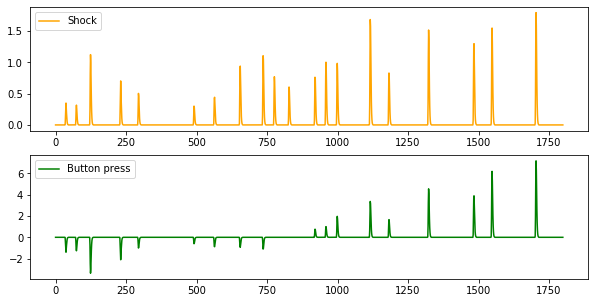

In [5]:
fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(dmat[:,-2],label='Shock',color='orange')
plt.legend()
plt.subplot(2,1,2)
plt.plot(dmat[:,-1],label='Button press',color='green')
plt.legend()

### EPI data generate by adding the two regressors and also some gaussian noise. 

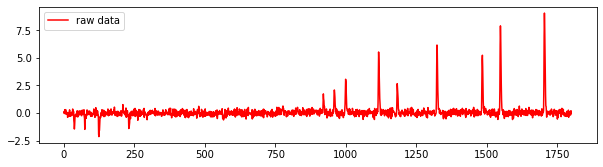

In [6]:
y = dmat[:,-2:].sum(axis=1)
np.random.seed(42)
noise = np.random.normal(0,0.2,y.size)
y = y + noise

plt.figure(figsize=(10,2.5))
plt.plot(y,color='red',label='raw data')
plt.legend()

### Lets run regression. The generated raw data should fit the two regressors fairly well since its a circular analysis.

In [7]:
import statsmodels.api as sm

In [8]:
lr_oracle = sm.OLS(y,X)
results = lr_oracle.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1816.
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:12:23   Log-Likelihood:                 367.75
No. Observations:                1800   AIC:                            -711.5
Df Residuals:                    1788   BIC:                            -645.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Run#1Pol#0       -0.0010      0.011     -0.096

### The Rsquare is ~0.9 indicating and good fit. Lets check the real values vs. the fitted values, and also the residuals

Text(0, 0.5, 'Residuals')

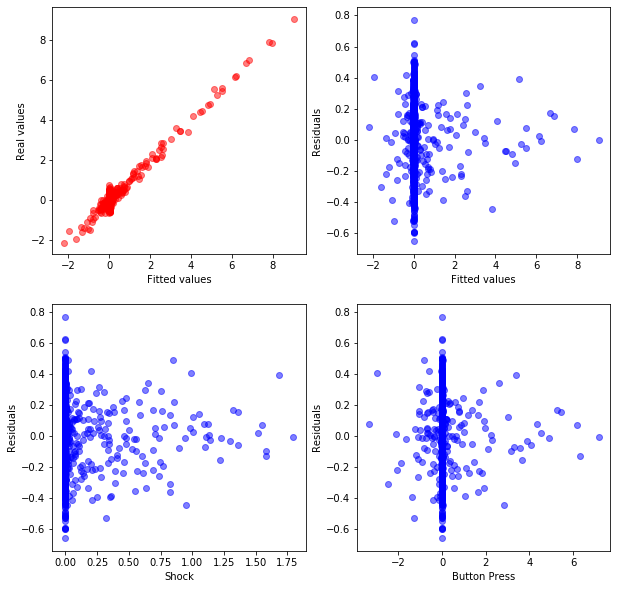

In [9]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(x=results.fittedvalues,y=y,alpha=0.5,c='red')
plt.xlabel('Fitted values')
plt.ylabel('Real values')

plt.subplot(2,2,2)
plt.scatter(x=results.fittedvalues,y=results.resid,alpha = 0.5,c='blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.subplot(2,2,3)
plt.scatter(x=X['onset_shock#0'],y=results.resid,alpha = 0.5,c='blue')
plt.xlabel('Shock')
plt.ylabel('Residuals')

plt.subplot(2,2,4)
plt.scatter(x=X['onset_shock#1'],y=results.resid,alpha = 0.5,c='blue')
plt.xlabel('Button Press')
plt.ylabel('Residuals')

Real vs Fitted values plot indicates as good fit (of course it had to be).

What needs to be checked is whether a different model provides a similar fit, if not the same.

We will test two models. In both models the button press regressror will be mean-centered within run. However,  

    1) In the first model, the run regressors will be concatenated. That is, there will be only two regressors of interest in the model: shock and button press.  
    2) In second model, each condition will have a separate regressor acorss runs. That means there will be 2 X (number of runs) regressors in the model.  

# **2. Model 1**

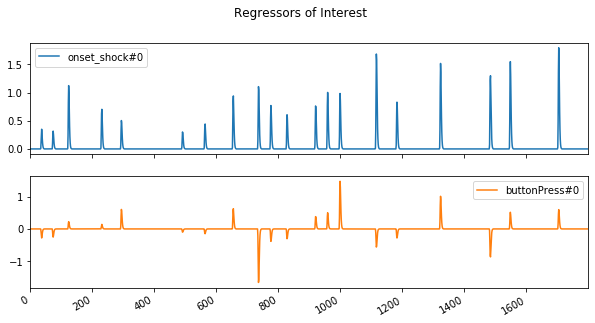

In [10]:
with open('./modeling/subj001_across_runs.1D') as file:
    names = [name.strip() for name in file.readlines()[3].split('"')[1].split(';')]

X = pd.DataFrame(np.loadtxt('./modeling/subj001_across_runs.1D'),columns=names)
_=X.iloc[:,-2:].plot(subplots=True,figsize=(10,5),title='Regressors of Interest')

**Note**: button press regressor has been mean-centered within run

In [11]:
lr_mod1 = sm.OLS(y,X)
results_mod1 = lr_mod1.fit()
print(results_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     226.9
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:12:50   Log-Likelihood:                -1095.0
No. Observations:                1800   AIC:                             2214.
Df Residuals:                    1788   BIC:                             2280.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Run#1Pol#0       -0.1670      0.024     -7.077

### Model fit is poor: ~60% of explained variance. Let's check the fitting and residuals.

Text(0, 0.5, 'Residuals')

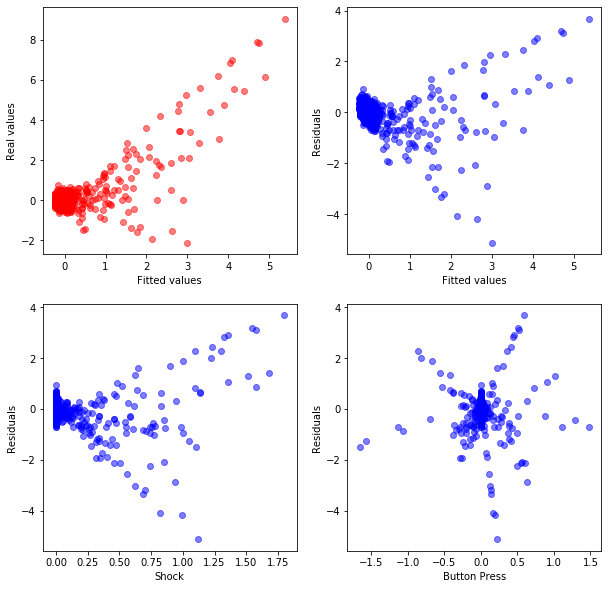

In [12]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(x=results_mod1.fittedvalues,y=y,alpha=0.5,c='red')
plt.xlabel('Fitted values')
plt.ylabel('Real values')

plt.subplot(2,2,2)
plt.scatter(x=results_mod1.fittedvalues,y=results_mod1.resid,alpha = 0.5,c='blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.subplot(2,2,3)
plt.scatter(x=X['onset_shock#0'],y=results_mod1.resid,alpha = 0.5,c='blue')
plt.xlabel('Shock')
plt.ylabel('Residuals')

plt.subplot(2,2,4)
plt.scatter(x=X['buttonPress#0'],y=results_mod1.resid,alpha = 0.5,c='blue')
plt.xlabel('Button Press')
plt.ylabel('Residuals')

### The model does not seem to account for shock very well; still some unexplained variance.

# **3. Model 2**

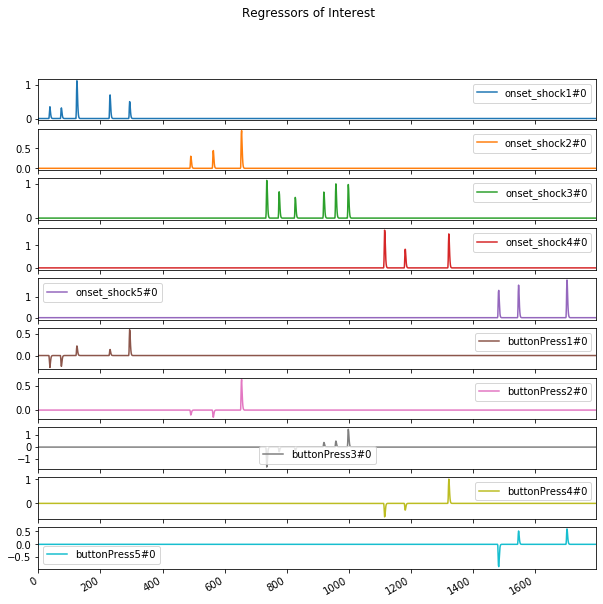

In [13]:
with open('./modeling/subj001_within_runs.1D') as file:
    names = [name.strip() for name in file.readlines()[3].split('"')[1].split(';')]

X = pd.DataFrame(np.loadtxt('./modeling/subj001_within_runs.1D'),columns=names)
_=X.iloc[:,-10:].plot(subplots=True,figsize=(10,10),title='Regressors of Interest')

In [14]:
lr_mod2 = sm.OLS(y,X)
results_mod2 = lr_mod2.fit()
print(results_mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1050.
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:12:56   Log-Likelihood:                 370.90
No. Observations:                1800   AIC:                            -701.8
Df Residuals:                    1780   BIC:                            -591.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Run#1Pol#0         0.0006      0.011      0.

### Explains almost at the same amount of variance (~90%) as the "oracle" model (model that was used to generate the data).  

Text(0, 0.5, 'Residuals')

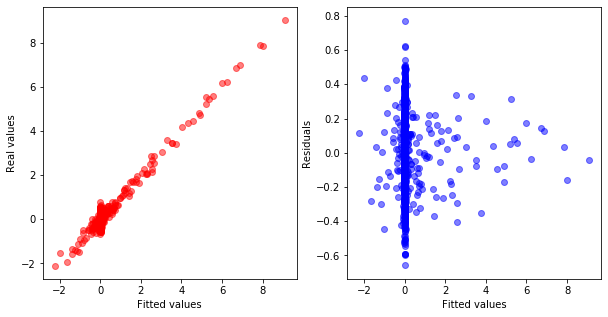

In [15]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x=results_mod2.fittedvalues,y=y,alpha=0.5,c='red')
plt.xlabel('Fitted values')
plt.ylabel('Real values')

plt.subplot(1,2,2)
plt.scatter(x=results_mod2.fittedvalues,y=results_mod2.resid,alpha = 0.5,c='blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

checking correlation of the regressors

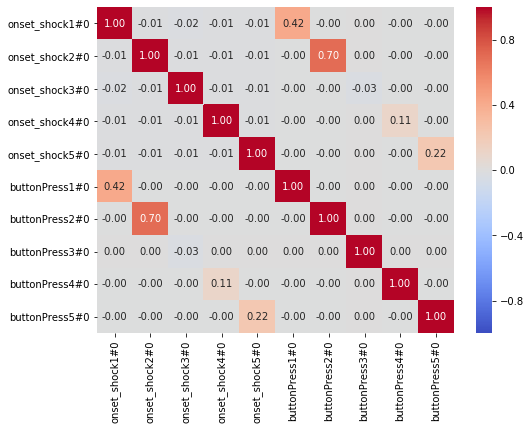

In [16]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(X.iloc[:,-10:].corr(),vmin=-1,vmax=1,cmap='coolwarm',annot=True,fmt='.2f')

### Combining Betas

In [17]:
shock_betas = results_mod2.params[[index for index in results_mod2.params.index if 'onset_shock' in index]]
shock_tvalues = results_mod2.tvalues[[index for index in results_mod2.tvalues.index if 'onset_shock' in index]]

shock_weights = (shock_tvalues/shock_betas)**2

shock_beta = (shock_weights*shock_betas).sum()/shock_weights.sum()

buttonPress_betas = results_mod2.params[[index for index in results_mod2.params.index if 'buttonPress' in index]]
buttonPress_tvalues = results_mod2.tvalues[[index for index in results_mod2.tvalues.index if 'buttonPress' in index]]
buttonPress_weights = (buttonPress_tvalues/buttonPress_tvalues)**2

buttonPress_beta = (buttonPress_weights*buttonPress_betas).sum()/buttonPress_weights.sum()

In [18]:
table = {'Models':['Oracle',
                  'Model 1: Acorss Runs',
                  'Model 2: Within Run'],
         'Rsquared':[np.round(results.rsquared_adj,2),
                     np.round(results_mod1.rsquared_adj,2),
                     np.round(results_mod2.rsquared_adj,2)],
         'Shock Beta Est.':[np.round(results.params[-2],2),
                       np.round(results_mod1.params[-2],2),
                       np.round(shock_beta,2)],
         'Button Press Est.':[np.round(results.params[-1],2),
                       np.round(results_mod1.params[-1],2),
                       np.round(buttonPress_beta,2)]}

pd.DataFrame(table)

,Models,Rsquared,Shock Beta Est.,Button Press Est.
0,Oracle,0.92,1.04,1.00
1,Model 1: Acorss Runs,0.58,2.68,0.78
2,Model 2: Within Run,0.92,2.80,1.05
